In [54]:
import pandas as pd
import numpy as np 
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('C:\\Users\\Eduarda\\Documents\\real_state\\data\\sell.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567135 entries, 0 to 567134
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  567135 non-null  object 
 1   operation                   567135 non-null  object 
 2   property_type               567135 non-null  object 
 3   place_name                  567135 non-null  object 
 4   place_with_parent_names     567135 non-null  object 
 5   geonames_id                 97 non-null      float64
 6   lat-lon                     273006 non-null  object 
 7   lat                         273006 non-null  float64
 8   lon                         273006 non-null  float64
 9   price                       530859 non-null  float64
 10  currency                    530841 non-null  object 
 11  price_aprox_local_currency  530859 non-null  float64
 12  price_aprox_usd             530859 non-null  float64
 13  surface_total_

In [4]:
df.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'state'],
      dtype='object')

## Feature Selection

In [5]:
# No information
cols = ['created_on', 'operation', 'property_type',
        'place_with_parent_names', 'geonames_id', 
        'lat-lon', 'lat', 'lon','properati_url',
        'title', 'image_thumbnail']

df = df.drop(columns=cols, axis=1)

In [6]:
# High correlation with price
cols = ['price_aprox_local_currency','price_aprox_usd','price_usd_per_m2','expenses','surface_total_in_m2']

df = df.drop(columns=cols,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567135 entries, 0 to 567134
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   place_name             567135 non-null  object 
 1   price                  530859 non-null  float64
 2   currency               530841 non-null  object 
 3   surface_covered_in_m2  422816 non-null  float64
 4   price_per_m2           390150 non-null  float64
 5   floor                  49845 non-null   float64
 6   rooms                  350437 non-null  float64
 7   description            567135 non-null  object 
 8   state                  567135 non-null  object 
dtypes: float64(5), object(4)
memory usage: 38.9+ MB


## Data Cleaning

### Correcting inconsistencies

In [8]:
df.currency.value_counts()

currency
BRL    530595
USD       167
MXN        79
Name: count, dtype: int64

In [9]:
df = df[df['currency'] == 'BRL']
df = df.drop(columns='currency', axis=1)

In [10]:
df.state.value_counts()

state
São Paulo              370944
Rio Grande do Sul       47114
Rio de Janeiro          38098
Minas Gerais            18205
Santa Catarina          18155
Paraná                   9183
Ceará                    5388
Bahia                    5351
Espírito Santo           4974
Paraíba                  3467
Rio Grande do Norte      2175
Distrito Federal         1882
Pernambuco               1636
Goiás                    1276
Pará                      649
Alagoas                   414
Mato Grosso               376
Sergipe                   351
Maranhão                  330
Amazonas                  162
Piauí                     135
Tocantins                 126
Miami                      81
Rondônia                   58
Mato Grosso do Sul         52
Acre                        7
Amapá                       6
Name: count, dtype: int64

In [11]:
df = df[df['state'] != 'Miami']

In [12]:
number_map = {
    'um': 1, 'uma': 1, 'dois': 2, 'duas': 2, 'três': 3, 'tres': 3,
    'quatro': 4, 'cinco': 5, 'seis': 6, 'sete': 7, 'oito': 8, 'nove': 9,
    'dez': 10
}
room_pattern = r'(\d+|um|uma|dois|duas|três|tres|quatro|cinco|seis|sete|oito|nove|dez)\s*(quarto|quartos|qtos?|dormitórios?|dorms?|suítes?|suite)'

extract_number_room = (df['description']
                        .str.lower()
                        .str.extract(room_pattern)[0]
                        .str.strip()
                        .replace(number_map)
)

df['rooms'] = df['rooms'].mask(df['rooms'] != extract_number_room, extract_number_room)

In [13]:
############### resover o room com numeros esquisitos

In [14]:
extract_number_room.value_counts().tail(20)

0
682270     1
2897       1
2898       1
0482       1
1550000    1
380003     1
305001     1
63         1
057102     1
150002     1
9563       1
20163      1
647410     1
79213      1
01142      1
057201     1
057302     1
057602     1
110962     1
1600003    1
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530514 entries, 0 to 567134
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   place_name             530514 non-null  object 
 1   price                  530514 non-null  float64
 2   surface_covered_in_m2  397001 non-null  float64
 3   price_per_m2           390073 non-null  float64
 4   floor                  49566 non-null   float64
 5   rooms                  391381 non-null  object 
 6   description            530514 non-null  object 
 7   state                  530514 non-null  object 
dtypes: float64(4), object(4)
memory usage: 36.4+ MB


In [16]:
df['floor'] = df['floor'].round().astype('Int64')
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')

### Handling missing values

In [17]:
df.isna().sum()

place_name                    0
price                         0
surface_covered_in_m2    133513
price_per_m2             140441
floor                    480948
rooms                    139133
description                   0
state                         0
dtype: int64

In [18]:
df['floor'] = df['floor'].fillna(0)

In [19]:
df.groupby('state')['rooms'].median()

state
Acre                   2.0
Alagoas                3.0
Amapá                  2.0
Amazonas               3.0
Bahia                  2.0
Ceará                  3.0
Distrito Federal       2.0
Espírito Santo         3.0
Goiás                  3.0
Maranhão               2.0
Mato Grosso            3.0
Mato Grosso do Sul     2.0
Minas Gerais           3.0
Paraná                 3.0
Paraíba                2.0
Pará                   3.0
Pernambuco             3.0
Piauí                  3.0
Rio Grande do Norte    2.0
Rio Grande do Sul      2.0
Rio de Janeiro         2.0
Rondônia               2.0
Santa Catarina         2.0
Sergipe                2.0
São Paulo              2.0
Tocantins              2.0
Name: rooms, dtype: float64

In [20]:
rooms_median_state = df.groupby('state')['rooms'].transform('median')

df['rooms'] = df['rooms'].fillna(rooms_median_state)

In [21]:
df.isna().sum()

place_name                    0
price                         0
surface_covered_in_m2    133513
price_per_m2             140441
floor                         0
rooms                         0
description                   0
state                         0
dtype: int64

In [22]:
price_m2_median_place = df.groupby('place_name')['price_per_m2'].transform('median')

df['price_per_m2'] = df['price_per_m2'].fillna(price_m2_median_place)

In [23]:
surface_m2_median_place = df.groupby('place_name')['surface_covered_in_m2'].transform('median')

df['surface_covered_in_m2'] = df['surface_covered_in_m2'].fillna(surface_m2_median_place)

In [24]:
df.isna().sum()

place_name                  0
price                       0
surface_covered_in_m2    1467
price_per_m2             1506
floor                       0
rooms                       0
description                 0
state                       0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isna().sum()

place_name               0
price                    0
surface_covered_in_m2    0
price_per_m2             0
floor                    0
rooms                    0
description              0
state                    0
dtype: int64

### Removing duplicates

In [27]:
df.duplicated().sum()

np.int64(21381)

In [28]:
df = df.drop_duplicates()

### Removing outliers

In [29]:
df.columns

Index(['place_name', 'price', 'surface_covered_in_m2', 'price_per_m2', 'floor',
       'rooms', 'description', 'state'],
      dtype='object')

In [30]:
numeric_cols = ['price', 'surface_covered_in_m2', 'price_per_m2','floor', 'rooms']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378411 entries, 0 to 567134
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   place_name                 378411 non-null  object 
 1   price                      378411 non-null  float64
 2   surface_covered_in_m2      378411 non-null  float64
 3   price_per_m2               378411 non-null  float64
 4   floor                      378411 non-null  Int64  
 5   rooms                      378411 non-null  float64
 6   description                378411 non-null  object 
 7   state_Acre                 378411 non-null  float64
 8   state_Alagoas              378411 non-null  float64
 9   state_Amapá                378411 non-null  float64
 10  state_Amazonas             378411 non-null  float64
 11  state_Bahia                378411 non-null  float64
 12  state_Ceará                378411 non-null  float64
 13  state_Distrito Federal     378411 

## Data Transformation

### Encoding categorical variables

In [32]:
one_hot = OneHotEncoder(sparse_output=False, drop=None)

state_encoded = one_hot.fit_transform(df[['state']])

column_names = one_hot.get_feature_names_out(['state'])

encoded_df = pd.DataFrame(state_encoded, columns=column_names, index=df.index)

df = pd.concat([df.drop('state', axis=1), encoded_df], axis=1)


In [34]:
df.head()

,place_name,price,surface_covered_in_m2,price_per_m2,floor,rooms,description,state_Acre,state_Alagoas,state_Amapá,...,state_Pernambuco,state_Piauí,state_Rio Grande do Norte,state_Rio Grande do Sul,state_Rio de Janeiro,state_Rondônia,state_Santa Catarina,state_Sergipe,state_São Paulo,state_Tocantins
0,Mondubim,155900.0,55.0,2892.218182,0,2.0,"Otimo Imovel com o melhor valor da regiao, con...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Ponta da Praia,230000.0,112.0,5454.545455,0,1.0,"Otimo Imovel com o melhor valor da regiao, con...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27,São Vicente,195000.0,65.0,4042.553191,0,2.0,"Otimo Imovel com o melhor valor da regiao, con...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28,São Vicente,400000.0,65.0,4042.553191,0,2.0,"Otimo Imovel com o melhor valor da regiao, con...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29,São Vicente,240000.0,65.0,4042.553191,0,2.0,"Otimo Imovel com o melhor valor da regiao, con...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1),
                                                    df['price'],
                                                    test_size=0.2,
                                                    random_state=42)

In [36]:
# target encoding

mean_price_by_place = X_train.join(y_train).groupby('place_name')['price'].mean()
X_train['place_encoded'] = X_train['place_name'].map(mean_price_by_place)

In [37]:
global_mean = y_train.mean()
X_test['place_encoded'] = X_test['place_name'].map(mean_price_by_place).fillna(global_mean)

### Normalization/Standardization

In [38]:
X_train.columns

Index(['place_name', 'surface_covered_in_m2', 'price_per_m2', 'floor', 'rooms',
       'description', 'state_Acre', 'state_Alagoas', 'state_Amapá',
       'state_Amazonas', 'state_Bahia', 'state_Ceará',
       'state_Distrito Federal', 'state_Espírito Santo', 'state_Goiás',
       'state_Maranhão', 'state_Mato Grosso', 'state_Mato Grosso do Sul',
       'state_Minas Gerais', 'state_Paraná', 'state_Paraíba', 'state_Pará',
       'state_Pernambuco', 'state_Piauí', 'state_Rio Grande do Norte',
       'state_Rio Grande do Sul', 'state_Rio de Janeiro', 'state_Rondônia',
       'state_Santa Catarina', 'state_Sergipe', 'state_São Paulo',
       'state_Tocantins', 'place_encoded'],
      dtype='object')

In [39]:
num_cols = ['surface_covered_in_m2', 'price_per_m2', 'floor', 'rooms', 'place_encoded']

X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

In [40]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [43]:
X_train[X_train_num.columns] = X_train_scaled
X_test[X_test_num.columns] = X_test_scaled

### Dimensionality reduction

In [46]:
X_train.columns

Index(['place_name', 'surface_covered_in_m2', 'price_per_m2', 'floor', 'rooms',
       'description', 'state_Acre', 'state_Alagoas', 'state_Amapá',
       'state_Amazonas', 'state_Bahia', 'state_Ceará',
       'state_Distrito Federal', 'state_Espírito Santo', 'state_Goiás',
       'state_Maranhão', 'state_Mato Grosso', 'state_Mato Grosso do Sul',
       'state_Minas Gerais', 'state_Paraná', 'state_Paraíba', 'state_Pará',
       'state_Pernambuco', 'state_Piauí', 'state_Rio Grande do Norte',
       'state_Rio Grande do Sul', 'state_Rio de Janeiro', 'state_Rondônia',
       'state_Santa Catarina', 'state_Sergipe', 'state_São Paulo',
       'state_Tocantins', 'place_encoded'],
      dtype='object')

In [58]:
X_train = X_train.drop(columns=['place_name','description'], axis=1)
X_test = X_test.drop(columns=['place_name','description'], axis=1)

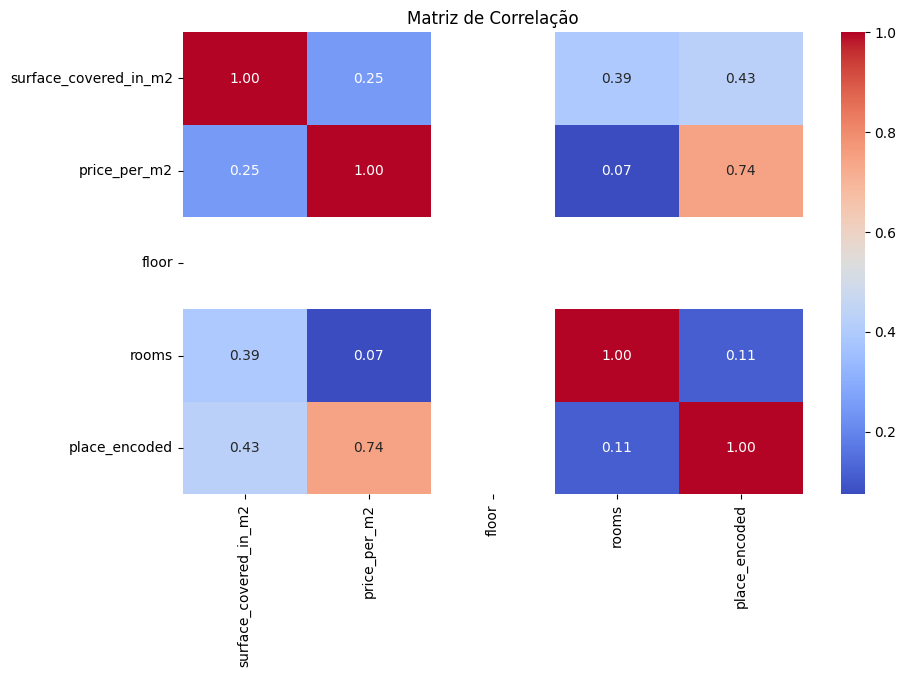

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

col = ['surface_covered_in_m2', 'price_per_m2', 'floor', 'rooms', 'place_encoded']

corr_matrix = X_train[col].corr(method='spearman')

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [60]:
# price_pr_m2 causa data leakage

X_train = X_train.drop(columns=['price_per_m2'], axis=1)
X_test = X_test.drop(columns=['price_per_m2'], axis=1)

In [61]:
X_train.columns

Index(['surface_covered_in_m2', 'floor', 'rooms', 'state_Acre',
       'state_Alagoas', 'state_Amapá', 'state_Amazonas', 'state_Bahia',
       'state_Ceará', 'state_Distrito Federal', 'state_Espírito Santo',
       'state_Goiás', 'state_Maranhão', 'state_Mato Grosso',
       'state_Mato Grosso do Sul', 'state_Minas Gerais', 'state_Paraná',
       'state_Paraíba', 'state_Pará', 'state_Pernambuco', 'state_Piauí',
       'state_Rio Grande do Norte', 'state_Rio Grande do Sul',
       'state_Rio de Janeiro', 'state_Rondônia', 'state_Santa Catarina',
       'state_Sergipe', 'state_São Paulo', 'state_Tocantins', 'place_encoded'],
      dtype='object')

### Feature engineering


Calcular diferença entre datas (ex: tempo desde publicação).
Distâncias (ex: distância até centro, escola, transporte).
Agrupamentos espaciais (clustering, bairros próximos).
Criar flags booleanas (ex: “tem suíte?”, “tem varanda?”).
Adicionar mais features relevantes: Idade do imóvel, tipo de condomínio

In [57]:
X_train
X_test

,place_name,surface_covered_in_m2,price_per_m2,floor,rooms,description,state_Acre,state_Alagoas,state_Amapá,state_Amazonas,...,state_Piauí,state_Rio Grande do Norte,state_Rio Grande do Sul,state_Rio de Janeiro,state_Rondônia,state_Santa Catarina,state_Sergipe,state_São Paulo,state_Tocantins,place_encoded
482997,Porto Alegre,-0.750,-0.035680,0.0,-1.0,"Apartamento de 01 dormitórios, com lareira, ch...",0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.063554
203232,Sagrada Família,1.450,-0.489607,0.0,1.0,"Prédio todo revestido em pastilhas, frente com...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.241334
433360,Saúde,-0.400,0.889671,0.0,0.0,Apartamento de 2 dorms. com 1 suíte muito bem ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.621475
545398,Embaré,0.725,-0.644893,0.0,1.0,"Apartamento em Santos, bem localizado no bairr...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.048929
31209,Praia Grande,0.025,-0.566276,0.0,-1.0,"Apartamento em Praia Grande/SP, localizado no ...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.581424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132029,Lapa,0.275,1.053723,0.0,0.0,Condomínio clube. Apto com 2 dorms 1 suite e 1...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.896112
405267,Cerqueira César,-0.575,1.600970,0.0,0.0,"Apartamento luxo, 2 dormitórios, 1 banheiro, 1...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.547149
261916,Porto Alegre,-0.275,0.014042,0.0,0.0,"NOBILITARE KOTEL oferta para VENDA, Apartament...",0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.063554
497753,Jardim Enseada,-0.175,-0.176523,0.0,0.0,"Lindo imóvel, localizado em uma área privile...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.512682


In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
y_pred = model.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, MAE: {mae}, R²: {r2}")

MSE: 42209265641.79267, MAE: 142054.39580098764, R²: 0.5969748762837273


In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
model = RandomForestRegressor(
    n_estimators=200,  # número de árvores
    max_depth=15,      # profundidade máxima para evitar overfitting
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

MSE: 30306507219.35, R²: 0.71
